<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-5 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Convolution Neural Networks </h2> </html>

<html> <h2 style="font-style:italic; color:blue;"> Task 1 : </h2> </html>

#### Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10, Multiple Classes datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

ttps://www.cs.toronto.edu/~kriz/cifar.html

Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

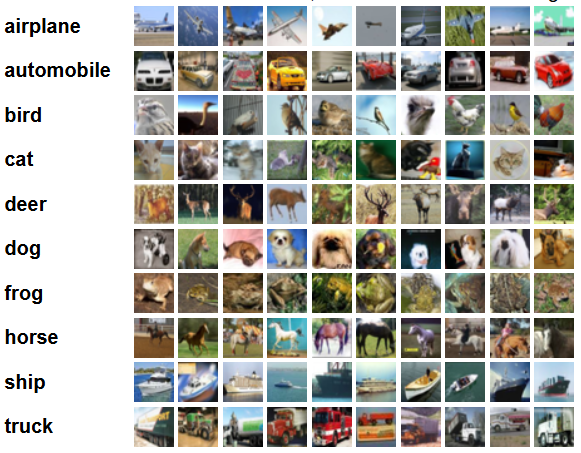

In [1]:
# Your code to import matplotlib, pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##### Following code loads the CIFAR 10 datset.

___________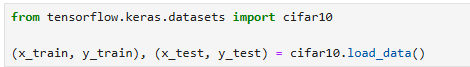

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [3]:
# Your code to print shapes of training and test data. Check how the data looks

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Your code to print the shape of one image

x_train[0].shape


(32, 32, 3)

(32, 32, 3)

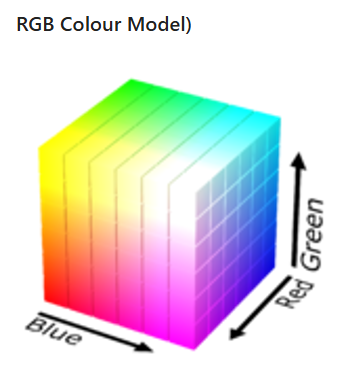

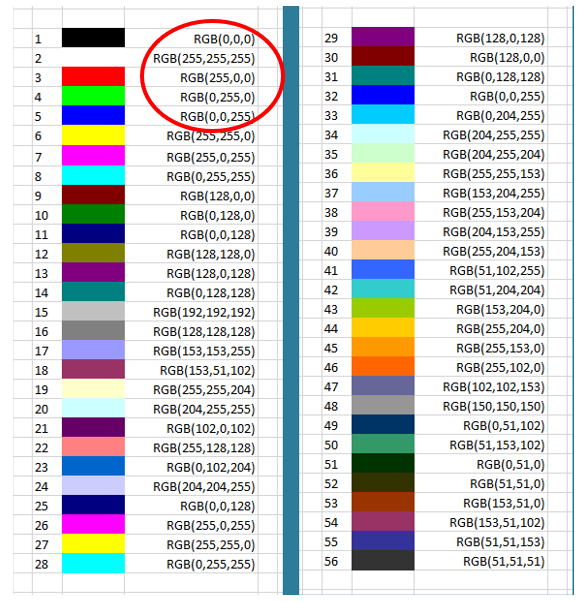

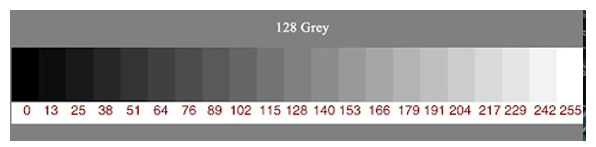

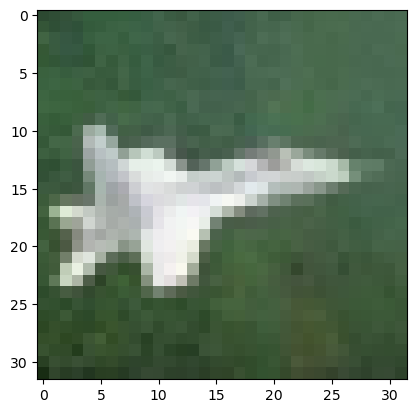

In [5]:
# Your code to show any sample image in the dataset. Use - plt.imshow()

plt.imshow(x_train[77])


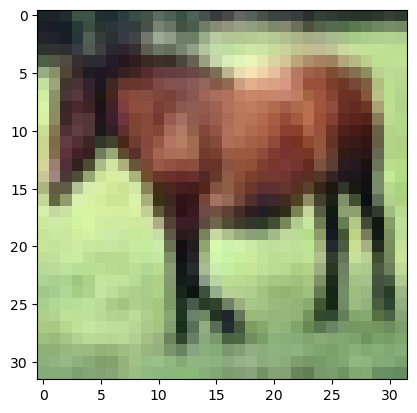

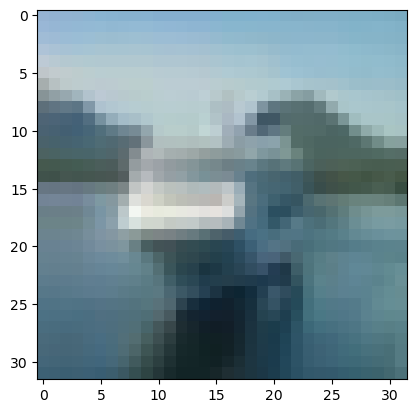

In [6]:
# Show any other image

plt.imshow(x_train[777])


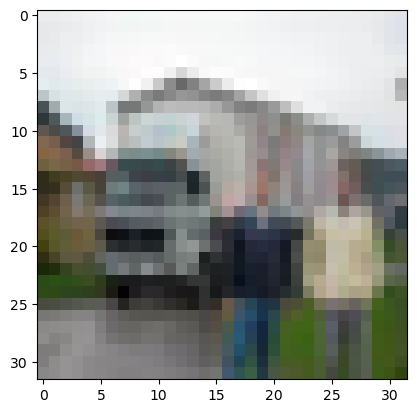

____________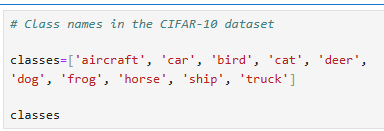

In [7]:
classes=['aircraft', 'car', 'bird','cat', 'deer', 'dog','frog','horse','ship', 'truck']
classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

______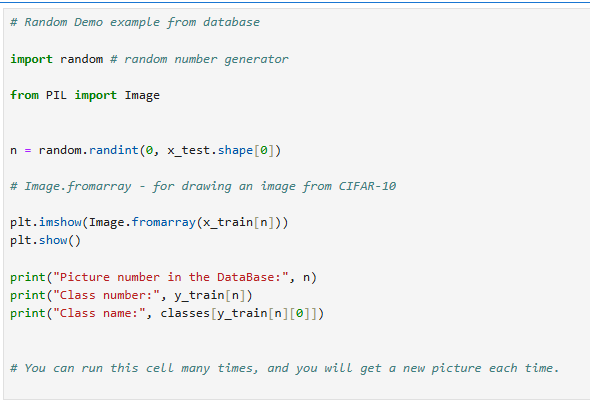

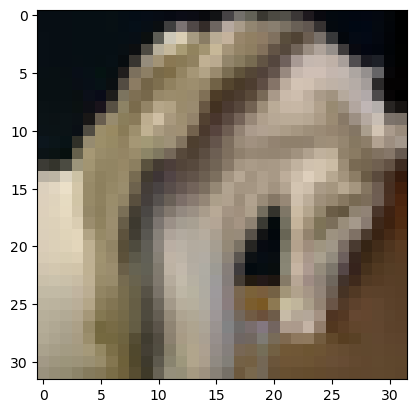

picture number in the database: 8643
class number: [7]
class name horse


In [8]:
import random
from PIL import Image
n=random.randint(0,x_test.shape[0])
plt.imshow(Image.fromarray(x_train[n]))
plt.show()
print('picture number in the database:', n)
print('class number:', y_train[n])
print('class name', classes[y_train[n][0]])

#### 

## PreProcessing

In [10]:
# Your code to print one image in digitals. Check what pixels look like. 

print(x_train[8643])

[[[  7  14  20]
  [  7  14  20]
  [  7  14  20]
  ...
  [  4   8  16]
  [  3   6   9]
  [  0   1   1]]

 [[  7  14  20]
  [  7  14  20]
  [  7  14  20]
  ...
  [  4   9  16]
  [  2   5   9]
  [  0   1   1]]

 [[  8  15  21]
  [  7  14  20]
  [  7  14  20]
  ...
  [  4   8  16]
  [  2   4   8]
  [  0   1   1]]

 ...

 [[170 162 141]
  [166 158 136]
  [163 155 131]
  ...
  [ 97  72  47]
  [ 95  70  45]
  [ 94  69  45]]

 [[162 153 134]
  [158 150 127]
  [156 149 123]
  ...
  [ 97  73  47]
  [ 95  71  45]
  [ 94  70  44]]

 [[154 146 126]
  [149 141 118]
  [147 140 114]
  ...
  [ 96  72  46]
  [ 95  71  45]
  [ 93  69  44]]]


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [12]:
# Your code to print the shape of any image i.e particular value in the x_train

print(x_train[77].shape)


(32, 32, 3)


(32, 32, 3)

In [15]:
# Your code to print the maximum value in x_train. Hint - Use .max()

print(x_train.max())

255


255

In [16]:
print(x_test.max())

255


____________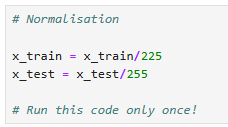

In [17]:
#зависит от макс значения 
x_train=x_train/255
x_test=x_test/255

__________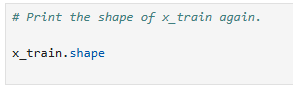

In [18]:
x_train.shape

(50000, 32, 32, 3)

(50000, 32, 32, 3)

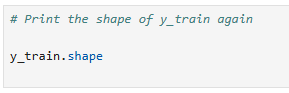

In [19]:
y_train.shape

(50000, 1)

(50000, 1)

## One hot vector encoding.
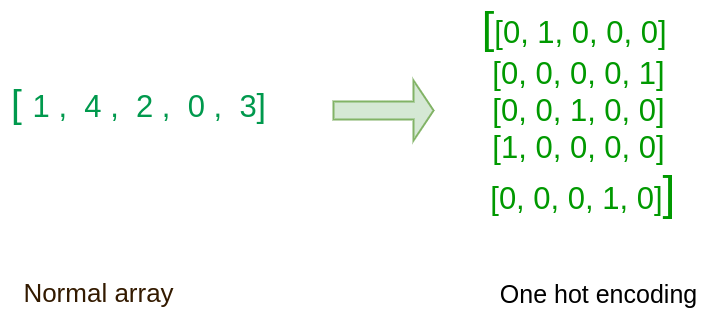


The "to_categorical()" is converting the integer value to binary categorical matrix : https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

________________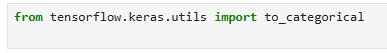

In [20]:
from tensorflow.keras.utils import to_categorical

___________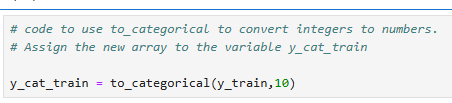

In [21]:
y_cat_train=to_categorical(y_train, 10)

In [23]:
# Your code to print the shape of the array y_cat_train
y_cat_train.shape


(50000, 10)

(50000, 10)

In [24]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"
print(y_train[0])
print(y_cat_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [26]:
# Your code to:
# Convert y_test to the encoded vector in the same manner
# Assign it to the variable y_cat_test

y_cat_test =to_categorical(y_test,10)


____________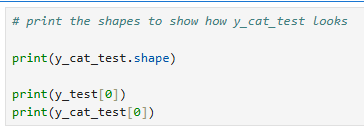

In [27]:
print(y_cat_test.shape)
print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


-----------------

## Creating a CNN Model

_____________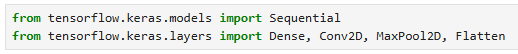

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [29]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# Add more convolution and pooling layers with your choice of filters, strides, and activation function
# ...
# CONVOLUTIONAL LAYERS
model.add(Conv2D(filters=50, kernel_size=(4,4),input_shape=(32, 32, 3), activation='elu',))
model.add(Conv2D(filters=35, kernel_size=(4,4),input_shape=(32, 32, 3), activation='tanh',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# Add a few dense layers. 
model.add(Dense(215, activation='gelu'))
model.add(Dense(115, activation='gelu'))
# ...
model.add(Dense(10, activation='softmax'))



C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


__________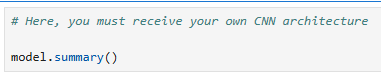

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 50)     │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 35)       │        28,035 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 35)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 560)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 215)            │       120,615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 115)            │        24,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,868 (788.55 KB)

 Trainable params: 201,868 (788.55 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 446,826 (1.70 MB)

 Trainable params: 446,826 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


___________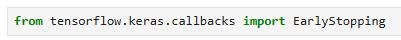

In [31]:
from  tensorflow.keras.callbacks import EarlyStopping

__________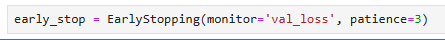

In [32]:
early_stop=EarlyStopping(monitor='val_loss', patience=3)

In [33]:
# Your code to compile the models (model.compile). 

# Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# You can use the optimiser of your choice

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [34]:
# Your code to fit the model (model.fit). 

# Use additional parameter -  callbacks = [early_stop] to enable early stopping. 
# Use 'history' array to save the training parameters for each epoch

history = model.fit(x_train, y_cat_train,
                   epochs=17,
                   validation_data=(x_test,y_cat_test),
                   shuffle=True,
                   verbose=1,
                   callbacks=[early_stop])


Epoch 1/17
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3906 - loss: 1.6599 - val_accuracy: 0.5661 - val_loss: 1.2222
Epoch 2/17
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5873 - loss: 1.1552 - val_accuracy: 0.6169 - val_loss: 1.0851
Epoch 3/17
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6601 - loss: 0.9612 - val_accuracy: 0.6540 - val_loss: 1.0007
Epoch 4/17
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7060 - loss: 0.8326 - val_accuracy: 0.6432 - val_loss: 1.0304
Epoch 5/17
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7396 - loss: 0.7386 - val_accuracy: 0.6633 - val_loss: 1.0211
Epoch 6/17
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7675 - loss: 0.6569 - val_accuracy: 0.6610 - val_loss: 1.0903


______________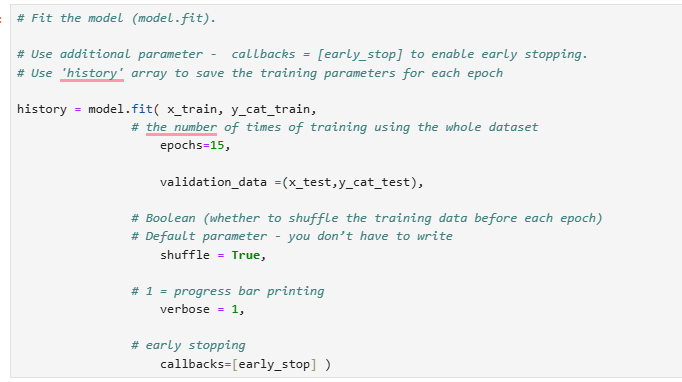

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.3481 - loss: 1.7774 - val_accuracy: 0.5303 - val_loss: 1.3498
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5634 - loss: 1.2280 - val_accuracy: 0.5538 - val_loss: 1.2199
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6255 - loss: 1.0565 - val_accuracy: 0.6245 - val_loss: 1.0497
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6674 - loss: 0.9428 - val_accuracy: 0.6840 - val_loss: 0.9512
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7039 - loss: 0.8390 - val_accuracy: 0.6653 - val_loss: 1.0131
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7268 - loss: 0.7695 - val_accuracy: 0.6328 - val_loss: 1.2476
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.7585 - loss: 0.6951 - val_accuracy: 0.6821 - val_loss: 1.0933


##### You can save the model in a file. Following code shows how to do this.

________________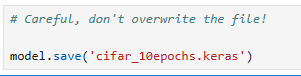

In [35]:
model.save('cifar_10epochs.keras')

##### Yiu can save the loss at every step. Following code shows how to do this. 

___________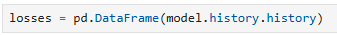

In [36]:
losses=pd.DataFrame(model.history.history)

In [40]:
# You code to print the first few rows of losses.

losses.head(7)


,accuracy,loss,val_accuracy,val_loss
0,0.47364,1.456030,0.5661,1.222190
1,0.60584,1.114910,0.6169,1.085119
2,0.66418,0.956465,0.6540,1.000725
3,0.70306,0.840651,0.6432,1.030418
4,0.73376,0.755731,0.6633,1.021142
5,0.76038,0.679395,0.6610,1.090345


,accuracy,loss,val_accuracy,val_loss
0,0.43480,1.560612,0.5303,1.349832
1,0.57198,1.201473,0.5538,1.219868
2,0.62928,1.049085,0.6245,1.049745
3,0.66792,0.944133,0.6840,0.951214
4,0.70052,0.851300,0.6653,1.013123
5,0.72508,0.783289,0.6328,1.247608
6,0.74762,0.724635,0.6821,1.093254


#### Visualise a plot between accuracy vs val_accuracy for all steps.

#### x axis will have the steps (epochs) 
#### y axis will have accuracy and val_accuracy 


_________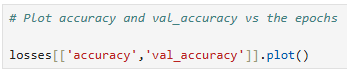

<Axes: >

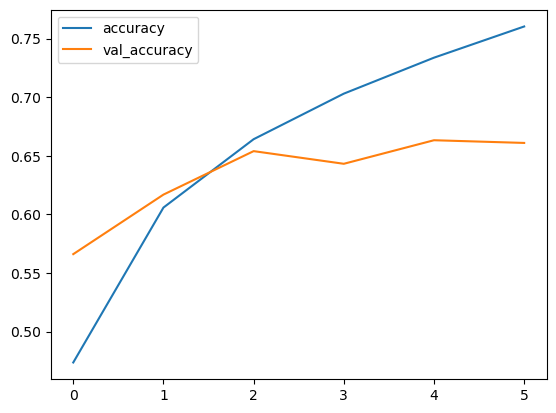

In [41]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

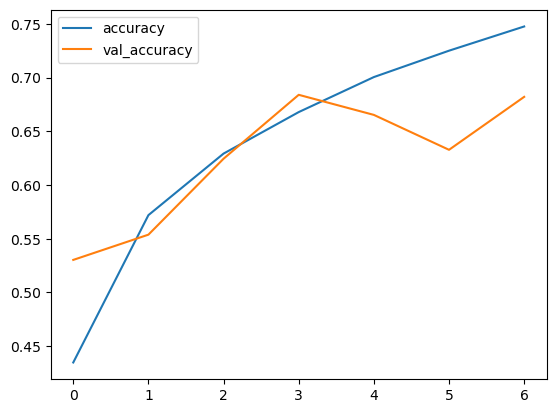

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

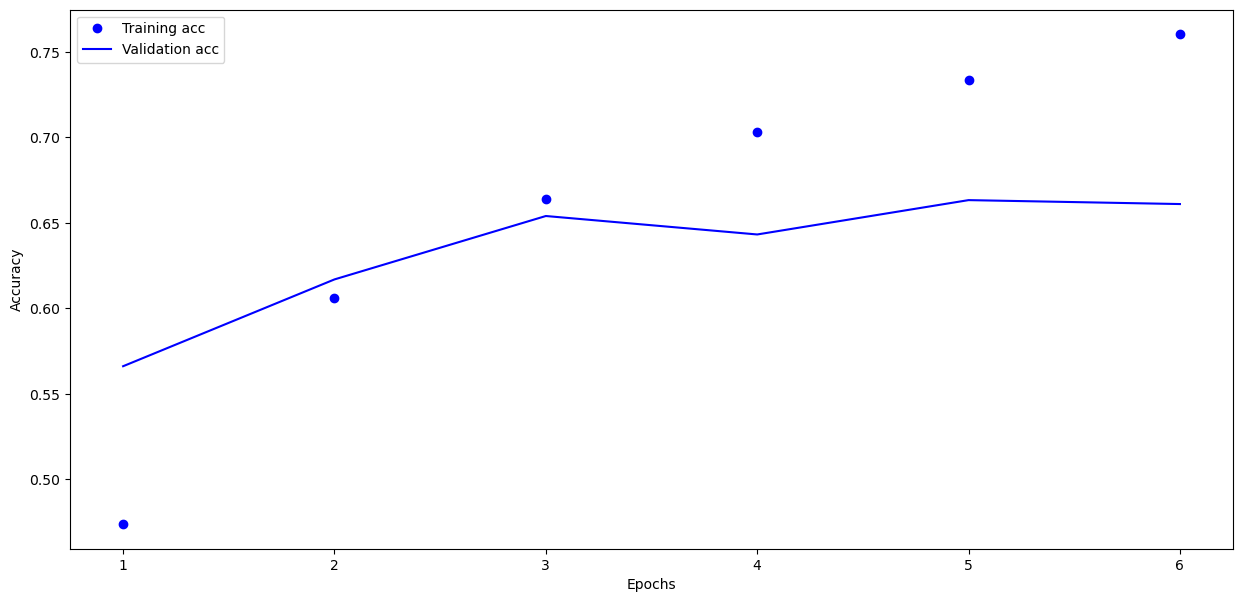

In [42]:
# Plot accuracy and val_accuracy for the neural network training process in more detail

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

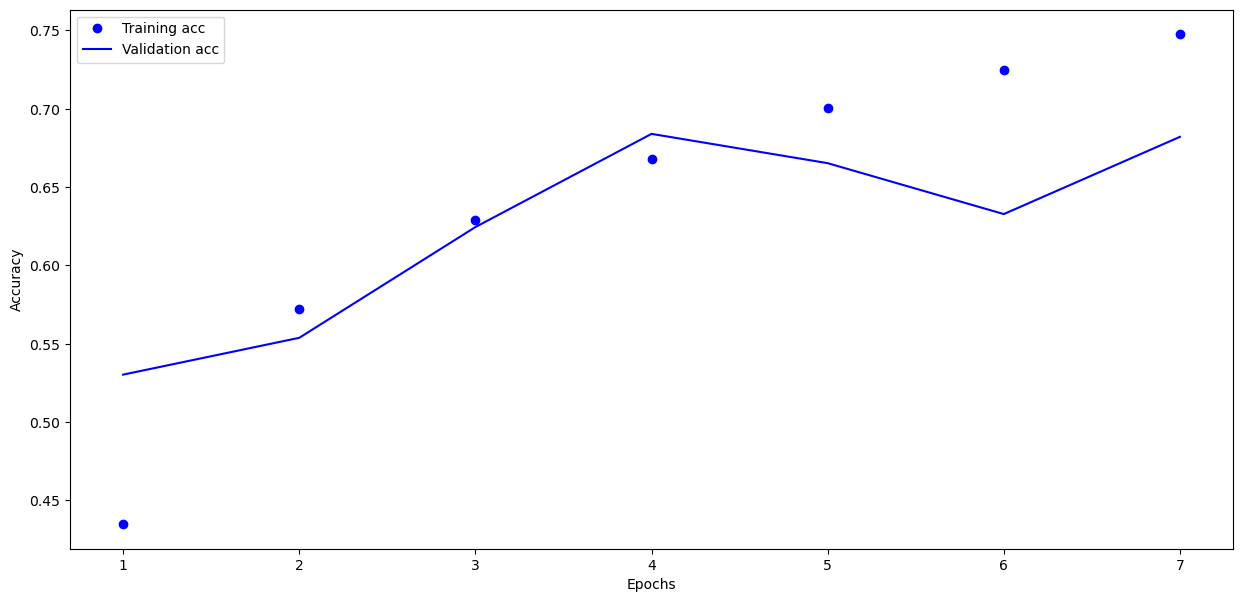

__________________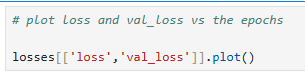

<Axes: >

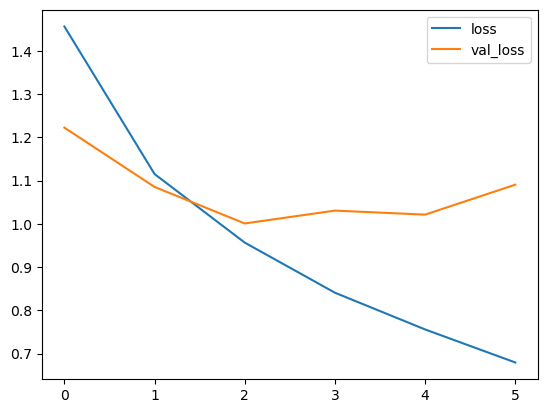

In [43]:
losses[['loss','val_loss']].plot()

<Axes: >

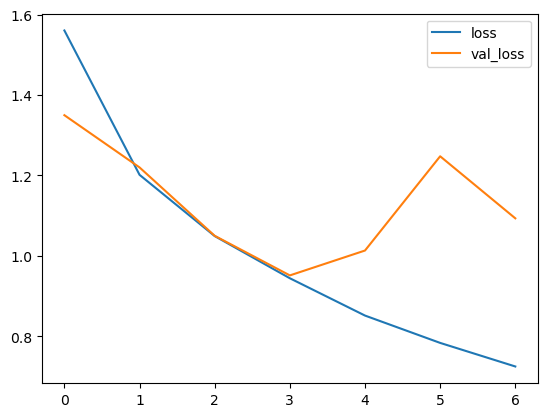

_____________________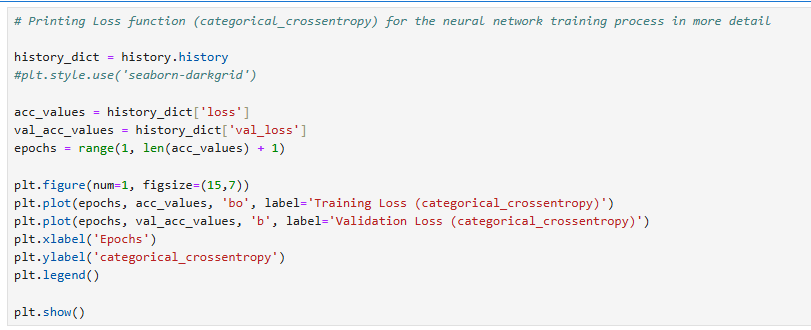

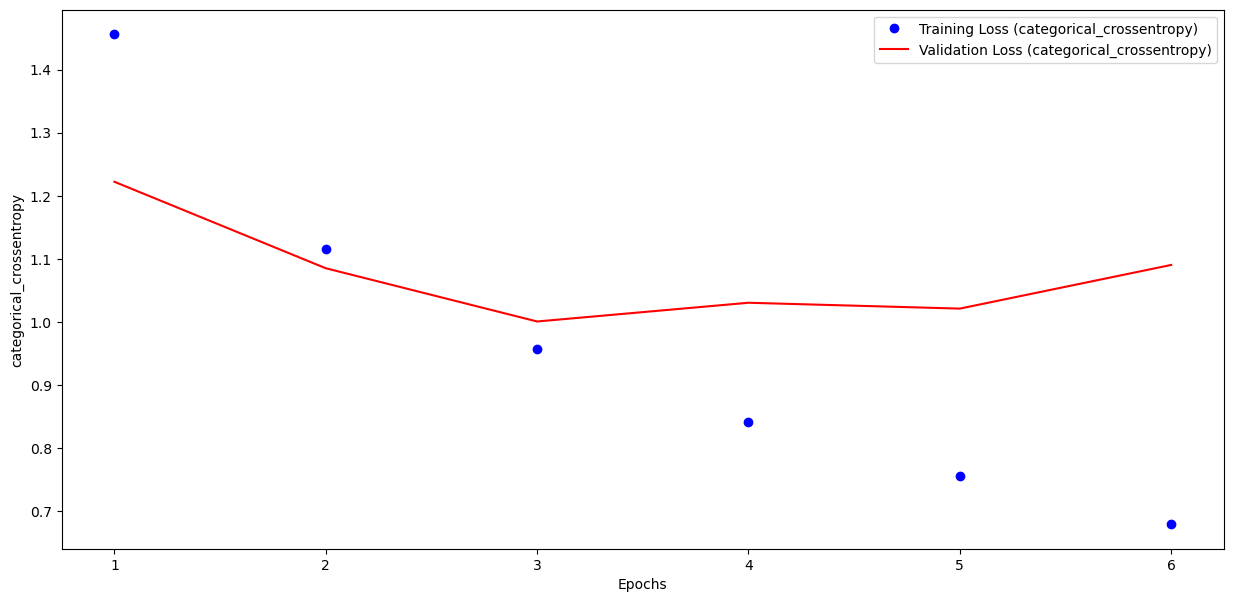

In [45]:
history_dict=history.history
acc_values=history_dict['loss']
val_acc_values=history_dict['val_loss']
epochs=range(1, len(acc_values)+1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'r', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()

plt.show()


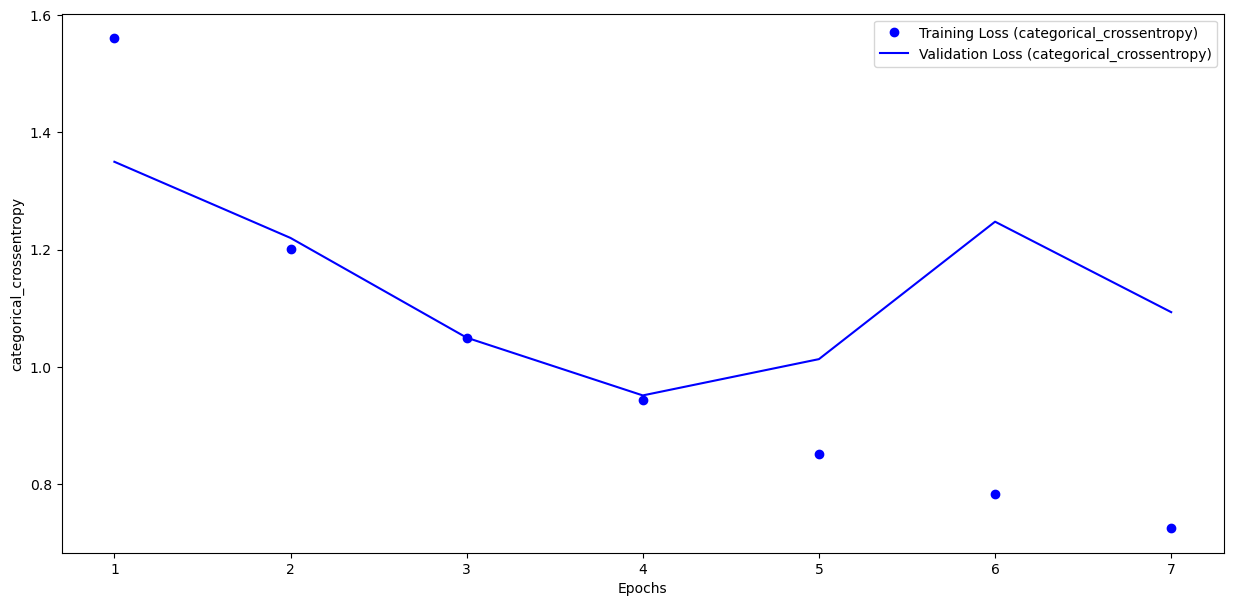

__________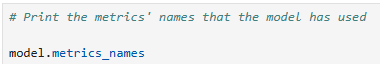

In [46]:
model.metrics_names

['loss', 'compile_metrics']

['loss', 'compile_metrics']

___________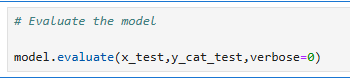

In [48]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0903446674346924, 0.6610000133514404]

In [107]:
# Evaluate the model

model.evaluate(x_test,y_cat_test,verbose=0)

[1.0932540893554688, 0.6820999979972839]

___________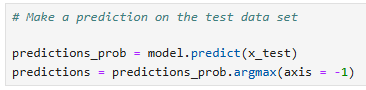

In [49]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [110]:
# Make a prediction on the test data set

predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


_______________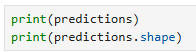

In [50]:
print(predictions)
print(predictions.shape)

[3 8 8 ... 5 1 7]
(10000,)


[3 8 1 ... 5 1 7]
(10000,)


##### You could get the full classification report. 

_____________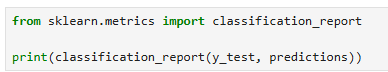

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68      1000
           1       0.75      0.79      0.77      1000
           2       0.61      0.55      0.58      1000
           3       0.49      0.46      0.48      1000
           4       0.72      0.53      0.61      1000
           5       0.67      0.46      0.55      1000
           6       0.75      0.74      0.75      1000
           7       0.78      0.68      0.73      1000
           8       0.64      0.86      0.73      1000
           9       0.62      0.79      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.82      0.76      0.79      1000
           2       0.81      0.38      0.52      1000
           3       0.56      0.45      0.50      1000
           4       0.56      0.76      0.64      1000
           5       0.53      0.72      0.61      1000
           6       0.83      0.68      0.75      1000
           7       0.76      0.74      0.75      1000
           8       0.80      0.75      0.77      1000
           9       0.62      0.89      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



##### You could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

______________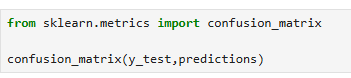

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[745,  22,  26,  12,  13,   4,   6,   2, 129,  41],
       [ 29, 794,   2,   5,   2,   2,   5,   2,  67,  92],
       [106,  18, 550,  74,  44,  33,  53,  19,  65,  38],
       [ 49,  31,  74, 464,  56, 110,  56,  26,  54,  80],
       [ 60,  17,  94,  80, 531,  23,  60,  70,  37,  28],
       [ 39,  17,  81, 184,  34, 464,  43,  64,  28,  46],
       [ 23,  19,  36,  62,  18,  10, 739,   9,  31,  53],
       [ 52,   9,  35,  57,  38,  40,  14, 682,  11,  62],
       [ 61,  36,   2,   7,   1,   0,   3,   0, 856,  34],
       [ 39,  99,   5,   7,   1,   2,   2,   3,  57, 785]], dtype=int64)

array([[697,  33,  12,  17,  33,  20,  11,  15,  84,  78],
       [  8, 762,   1,   9,   1,   7,   7,   3,  18, 184],
       [ 77,   7, 378,  64, 190, 150,  53,  34,  17,  30],
       [ 21,  17,  14, 447, 117, 245,  32,  40,  20,  47],
       [ 14,   2,  11,  34, 760,  47,  19,  83,  12,  18],
       [  8,   4,  11, 106,  71, 717,  13,  40,   8,  22],
       [  7,   9,  21,  76, 107,  51, 684,   9,   8,  28],
       [ 13,   3,   8,  23,  74,  94,   3, 742,   5,  35],
       [ 62,  42,   4,  15,  12,  19,   3,   5, 748,  90],
       [  8,  47,   4,   7,   4,  15,   3,   7,  19, 886]], dtype=int64)

_______________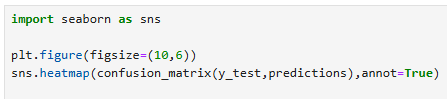

<Axes: >

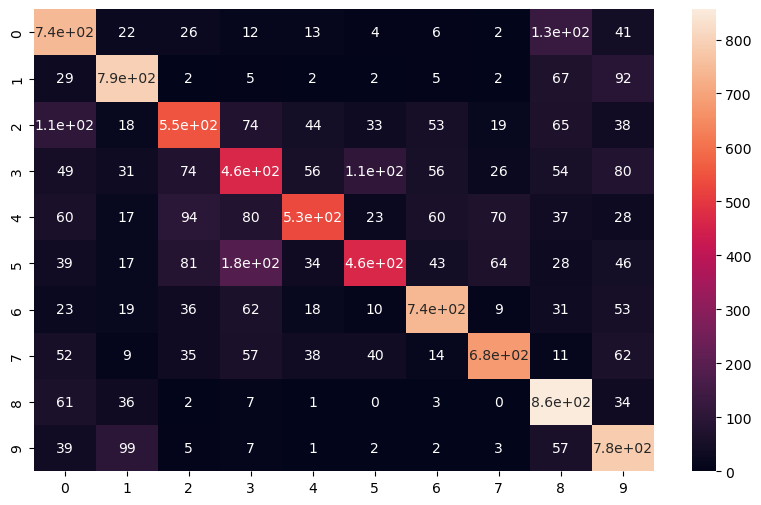

In [55]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

<Axes: >

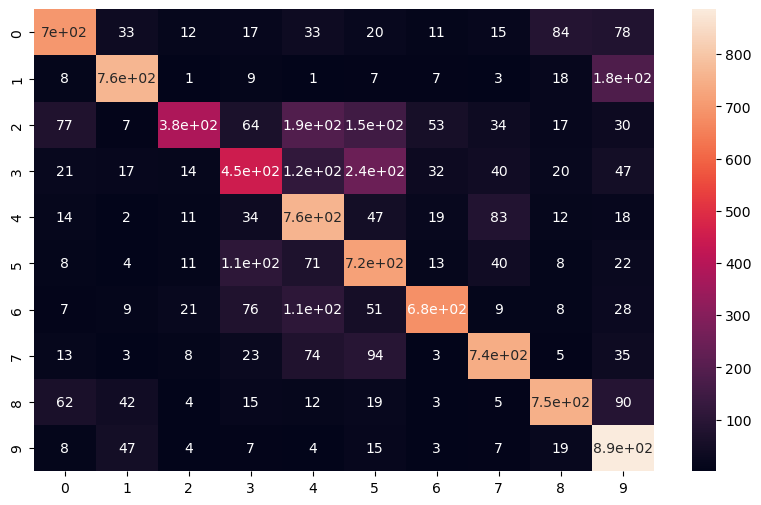

### Following code makes a prediction on specific image.

____________________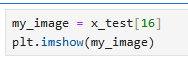

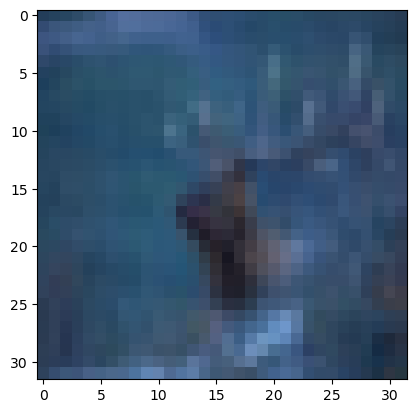

In [56]:
my_image = x_test[22]
plt.imshow(my_image)

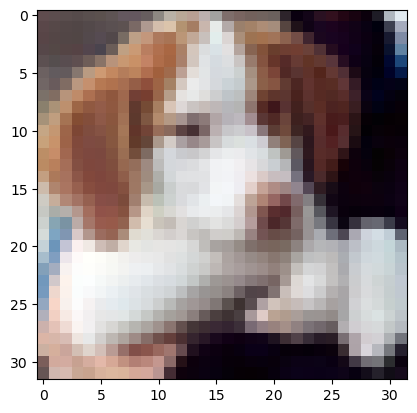

In [132]:
my_image = x_test[16]
plt.imshow(my_image)

______________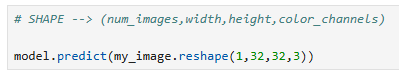

In [57]:
model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1.0323243e-01, 1.8996220e-06, 3.6416523e-02, 5.3763422e-05,
        8.4387815e-01, 1.8232833e-05, 3.4224180e-05, 1.1629085e-05,
        1.6349493e-02, 3.6664114e-06]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


array([[1.13101294e-07, 3.55311378e-04, 8.73138470e-06, 8.25540442e-03,
        4.04348157e-07, 9.91317272e-01, 2.81208969e-07, 4.03509657e-05,
        4.70231180e-06, 1.75437362e-05]], dtype=float32)

In [137]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

_______________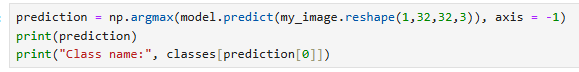

In [58]:
prediction=np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)
print(prediction)
print('class name:', classes[prediction[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[4]
class name: deer


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[5]
Class name: dog


### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


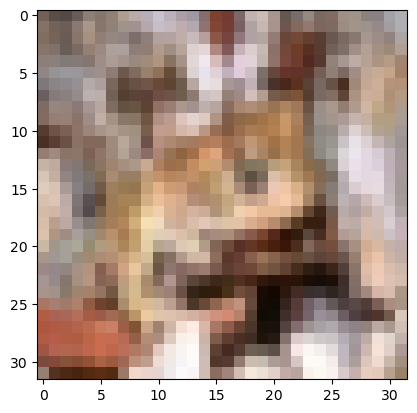

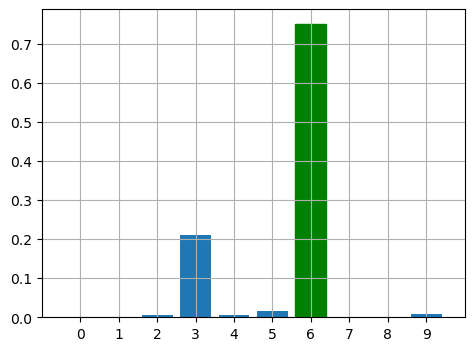

The predicted answer: frog 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [59]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,
# which this neural network will recognise with the probability indicated on the graph.

In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 50)     │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 35)       │        28,035 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 35)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 560)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 215)            │       120,615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 115)            │        24,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,606 (2.31 MB)

 Trainable params: 201,868 (788.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,738 (1.54 MB)

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the model's summary

### 2. Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.

### 3. Based on this analysis, determine the optimal number of epochs for training your model. 

<html> <h2 style="font-style:italic; color:blue;"> Task 2 (Optional): </h2> </html>

#### Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [63]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Nadam']
# Create an empty list to store scores
accuracy_scores = []
# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list
for opt in optimizers:
    print(f"Training with {opt} optimizer...")
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Обучаем модель

    history1 = model.fit(x_train, y_cat_train,
                   epochs=3,
                   validation_data=(x_test,y_cat_test),
                   shuffle=True,
                   verbose=1)
    # Оцениваем модель на тестовых данных
 
    accuracy = model.evaluate(x_test, y_cat_test, verbose=0)
    accuracy_scores.append(accuracy)

Training with SGD optimizer...
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8649 - loss: 0.4574 - val_accuracy: 0.5091 - val_loss: 2.4437
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9403 - loss: 0.1901 - val_accuracy: 0.6771 - val_loss: 1.5217
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9641 - loss: 0.1145 - val_accuracy: 0.6799 - val_loss: 1.5860
Training with RMSprop optimizer...
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9214 - loss: 0.2214 - val_accuracy: 0.6558 - val_loss: 1.7431
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9193 - loss: 0.2365 - val_accuracy: 0.6462 - val_loss: 1.9363
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9207 - loss: 0.2329 - val_accuracy: 0.6552 - val_loss: 1.9766
Training with Adam optimizer...
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9105 - loss: 0.2587 - val_accuracy: 0.6606 - va

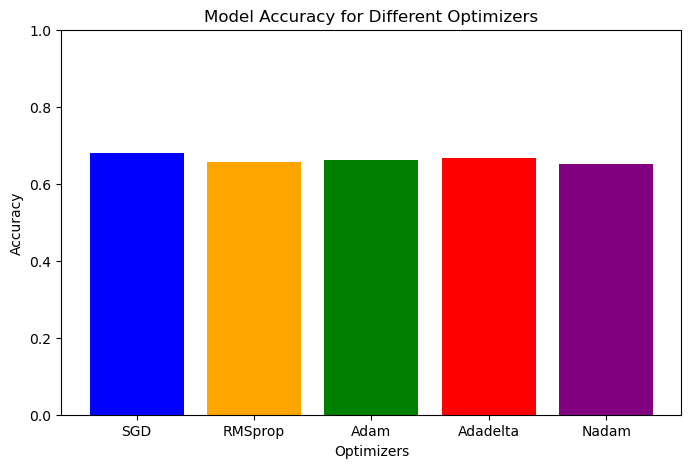

In [67]:
# Plot score vs optimiser 

plt.figure(figsize=(8, 5))

# Извлекаем только accuracy из списка кортежей
accuracy_values = [score[1] for score in accuracy_scores]

plt.bar(optimizers, accuracy_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
plt.title("Model Accuracy for Different Optimizers")
plt.ylim(0, 1)  # Точность обычно в диапазоне 0-1
plt.show()
